In [1]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
#Uploading csv dataset
data=pd.read_csv('/Users/montu/Downloads/Git/Heart Disease Diagnostic/Heart Disease data/Heart Disease data.csv')
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
#performing exploratory data analysis
data.isnull().sum(axis=0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
data.shape

(1025, 14)

In [15]:
#target variable shows the presence or absence of heart disease
data.groupby('target').size()

target
0    499
1    526
dtype: int64

Text(0.5, 1.0, 'Heart disease population %')

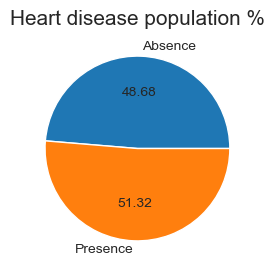

In [23]:
#piechart for % population of heart disease
plt.figure(figsize=(5,3))
plt.pie(data.groupby('target').size(), labels=('Absence', 'Presence'), autopct='%.2f')
plt.title('Heart disease population %', fontsize = 15)

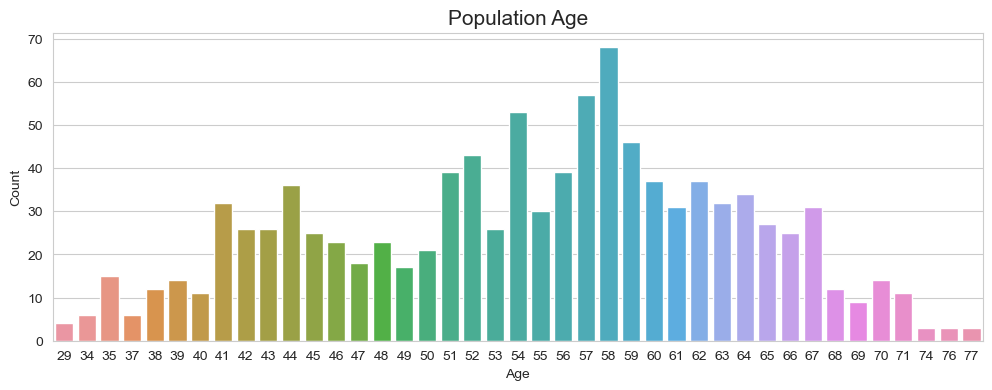

In [28]:
#creating a countplot using Matplotlib and Seaborn for Age attribute
plt.figure(figsize=(12,4))
sns.countplot(x='age', data=data)
plt.title('Population Age', fontsize=15)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()